# Data Mining – Classification

#### By: Matthew Powers and Parker Spaan

Dataset: https://archive-beta.ics.uci.edu/dataset/59/letter+recognition

## Part 1

Explain each of the following data mining techniques in terms of how the algorithm works, its strengths, and weaknesses:
Additionally listed is an example of each data mining functionality using a real-life database or data set.

Classification:
Classification is a data mining technique that involves the use of statistical algorithms to identify a class or group to which a new data sample belongs. It is a supervised learning algorithm that is trained on a labeled dataset, where the output variable is categorical and the goal is to predict the class of the new data sample.

The algorithm works by learning the relationship between the input variables and the class labels. It then uses this relationship to predict the class of new, unseen data samples. The strengths of classification include its ability to handle large datasets and its ability to predict categorical outputs. Its weaknesses include its tendency to overfit to the training data and its susceptibility to bias if the training data is imbalanced.

An example of a classification problem using a real-life database or data set is the prediction of credit card default. Given a dataset of credit card customers and their payment histories, the goal is to train a classification algorithm to predict whether a new customer is likely to default on their credit card payments.

Prediction:
Prediction is a data mining technique that involves the use of statistical algorithms to predict a continuous or numerical value based on a set of input variables. It is also a supervised learning algorithm that is trained on a labeled dataset, where the output variable is numerical and the goal is to predict the value of the output variable for new, unseen data samples.

The algorithm works by learning the relationship between the input variables and the output variable. It then uses this relationship to predict the value of the output variable for new, unseen data samples. The strengths of prediction include its ability to handle large datasets and its ability to predict numerical outputs. Its weaknesses include its susceptibility to overfitting to the training data and its difficulty in handling complex non-linear relationships between the input variables and the output variable.

An example of a prediction problem using a real-life database or data set is the prediction of housing prices. Given a dataset of housing prices and their associated characteristics (e.g., location, number of bedrooms, square footage, etc.), the goal is to train a prediction algorithm to predict the price of a new, unseen house based on its characteristics.


## Part 2

### Load the appropriate software packages

In [1]:
# Importing the libraries
# Latest Push
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

### Pre-process the data
#### Setting up an array of possible outcomes. From this we are setting our dataset to take in the value of the letter. If not it is inputting x. This lamda will be filled later

In [2]:
dataset = pd.read_csv('letter-recognition.csv', header=None)
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for i in range(0,len(letters)):
    dataset[0] = dataset[0].apply(lambda x: i if x == letters[i] else x)

### Subset the data
#### Creating two different subsets.

In [3]:
X = dataset.iloc[:, 1:17].values
y = dataset.iloc[:, 0].values

### Visualize dataset
The data represents statistical properties of a set of letter recognization.

In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Split the data into training and testing sets
#### Creating training and testing sets of both our X and Y subsets. Able to train this with a 75-25 split to tell if we are correctly predicting what letter should come from the data that is pushed into our machine.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Scale the training and testing sets
#### fitting linear regression model to the training dataset. X_test is then futtubg linear regression model to the training dataset. This regression model is then used to predict values in the trianing dataset. This is based on the values in the orginal data set.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Build the classification model
#### We are setting our number of neighbors to be 3 (k). From here we are simply creating our KNeighborsClassifier to apply the algorithm. With this we are simply stating to look at 3 away. Then we are fitting our model with the data from our X and Y training data.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
numNeighbors = 3
classifier = KNeighborsClassifier(n_neighbors = numNeighbors)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Run the model (make predictions)

In [8]:
y_pred = classifier.predict(X_test)


### Display classification results

#### Quantitative Simply getting out the accuracy we are seeing when our k is 3.

In [9]:
print("Accuracy of model at K=", numNeighbors," is",metrics.accuracy_score(y_test, y_pred))

Accuracy of model at K= 3  is 0.9516


### Visualize the confusion matrix
#### While not the prettiest confusion matrix. It is showing there is fairly strong accuracy of finding the correct value. Each letter is a true positive more than it is not.

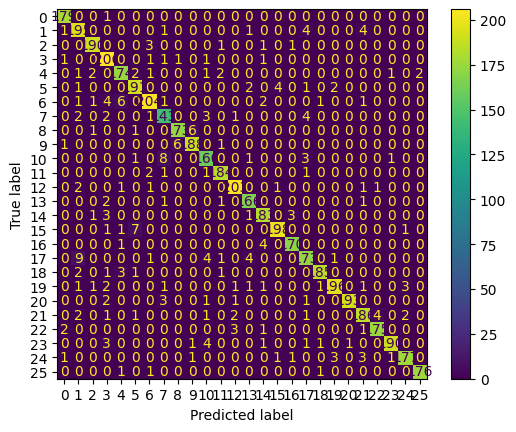

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Improve the model and find the optimal value

Minimum error:- 0.0442 at K = 1


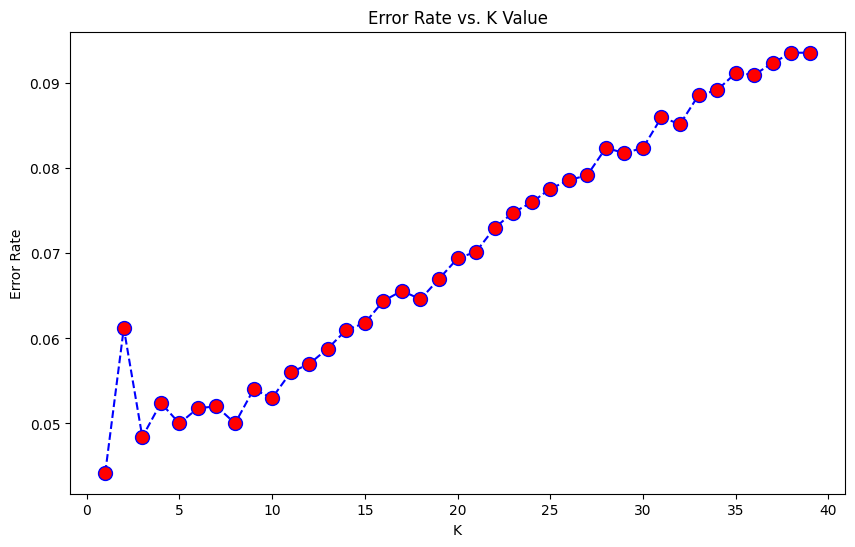

In [11]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

### From the plot, which K yields the smallest error? 
#### Let us plot accuracy vs K value.

Maximum accuracy:- 0.9558 at K = 1


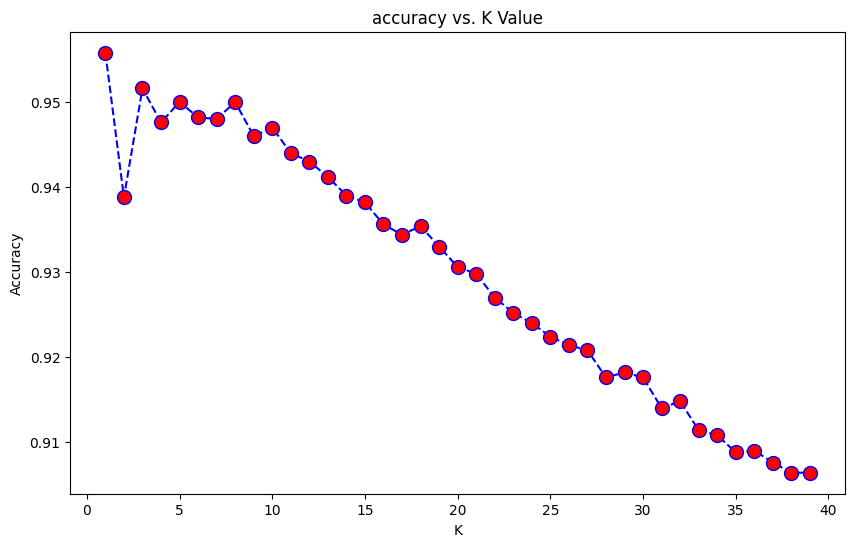

In [12]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

### ROC Curve
#### The curve is to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests.  Area under curve gives a  measurment of the performance of the test that was run. The 'higher' the arc is the better the test is for the data set that is being tested.

##### In layment terms. We are testing how well a certain test works. The larger the area under a curve is a correlation to the accuracy of the the method chosen. The closer to the upper left hand corner the better the prediction is. If it were to perfectly touch the top left corner this would mean we are 100% of the time knowing a value is true. Never getting false positives or negatives. As we can see with our ROC curve that is provided we are able to conclude that while the K nearest neighbor was a hassle to use with this data it was more or less predictive.


[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test_binary shape: (5000, 25)
y_pred shape: (5000, 25)
y_test unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
y_pred unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


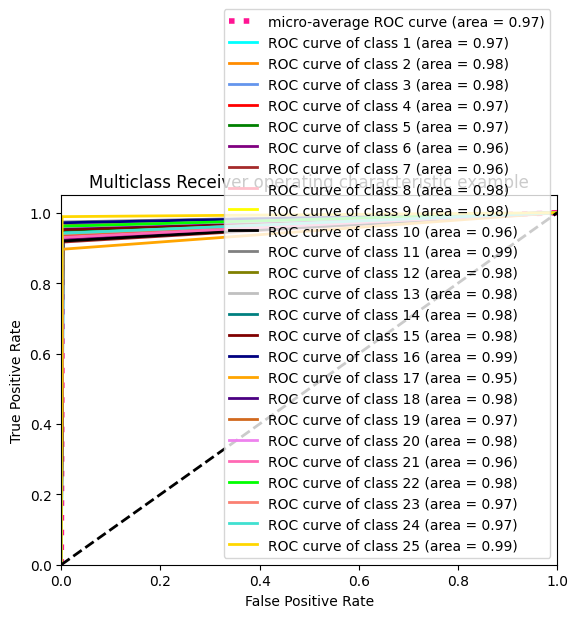

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


# Convert y_test to binary matrix
y_test_binary = np.zeros((len(y_test), 25))
for i in range(len(y_test)):
    y_test_binary[i][y_test[i] - 1] = 1

print(y_test_binary)
    
y_pred_binary = np.zeros((len(y_pred), 25))
for i in range(len(y_pred)):
    y_pred_binary[i][y_pred[i] - 1] = 1
    
print("y_test_binary shape:", y_test_binary.shape)
print("y_pred shape:", y_pred_binary.shape)

print("y_test unique values:", np.unique(y_test))
print("y_pred unique values:", np.unique(y_pred))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(25):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_binary[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), y_pred_binary.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class and micro-average ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'yellow', 'black', 'gray', 'olive', 'silver', 'teal', 'maroon', 'navy', 'orange', 'indigo', 'chocolate', 'violet', 'hotpink', 'lime', 'salmon', 'turquoise', 'gold']

for i, color in zip(range(25), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Analysis
##### With the data provided of trying to guess a letter based on the numeric values given. We are able to conclude with around a 95.16 % (based on k = 3) confidence we are finding the correct letter. When given seemingly random values from our data set. K nearest neighbors is looking at these values. Knowing what values are needed for a letter to be produced, and able to identify that if these values are close this means they are neighbors and more than likely will be a char "x". This model is often used to translate hand written characters to be read by a computer, or classifying a flower based on characteristics of the plant. The data set found is another example of what it is able to do. This is simply knowing we have 25 outcomes. What numeric values lead to what letters. 
##### The closer area we have (k = 1 or 3) increases the accuracy. The further away decreases. This is simply explained because if we looked at values for a - h, there are MANY neighbors. More neighbors decreases our chance of correctly guessing what character the presented data is supposed to be correlated to. To better explain. If we are only looking at a few close neighbors, and they are all point to A. The numeric values passed in are more than likely A. Where else if we look at 29 neighbors and they are all letters of the alphabet. this reduces our accuracy of correctly guessing A as the neighbors could be data points that are meant for a - h.